<a href="https://colab.research.google.com/github/ayishamanzoor2024/Hotel-review-sentiment-analysis/blob/main/Hotel_Reviews_Analysis_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Loading the uploaded file
data = pd.read_csv('/content/drive/MyDrive/Hotel_Reviews.csv')

# Printing the first few rows to confirm it's loaded
print(data.head())
print(data.info())

   Unnamed: 0                                              query  \
0           0  https://www.google.com/maps/search/PARK+INN+YA...   
1           1  https://www.google.com/maps/search/PARK+INN+YA...   
2           2  https://www.google.com/maps/search/PARK+INN+YA...   
3           3  https://www.google.com/maps/search/PARK+INN+YA...   
4           4  https://www.google.com/maps/search/PARK+INN+YA...   

                                         name  \
0  Park Inn by Radisson Abu Dhabi, Yas Island   
1  Park Inn by Radisson Abu Dhabi, Yas Island   
2  Park Inn by Radisson Abu Dhabi, Yas Island   
3  Park Inn by Radisson Abu Dhabi, Yas Island   
4  Park Inn by Radisson Abu Dhabi, Yas Island   

                               google_id                     place_id  \
0  0x3e432e2a7244383d:0xf8d272c7ed03a9bf  ChIJPThEciouQz4Rv6kD7cdy0vg   
1  0x3e432e2a7244383d:0xf8d272c7ed03a9bf  ChIJPThEciouQz4Rv6kD7cdy0vg   
2  0x3e432e2a7244383d:0xf8d272c7ed03a9bf  ChIJPThEciouQz4Rv6kD7cdy0vg   
3  0

In [ ]:
# Data Cleaning & Pre-Processing

# Dropping unnecessary columns to reduce noise
data_clean = data.drop([
    'Unnamed: 0', 'query', 'google_id', 'place_id',
    'location_link', 'reviews_link', 'author_link',
    'author_image', 'review_img_url', 'review_img_urls',
    'review_photo_ids', 'review_link', 'reviews_id'
], axis=1)

# Converting timestamp columns to datetime format
data_clean['review_datetime_utc'] = pd.to_datetime(data_clean['review_datetime_utc'])

# Filling missing review text with a placeholder
data_clean.loc[:, 'review_text'] = data_clean['review_text'].fillna('No review provided')

# Checking for any remaining missing values
print(data_clean.isnull().sum())
print(data_clean.head())


name                                       0
reviews                                    0
rating                                     0
review_id                                  0
review_pagination_id                       4
author_title                               0
author_id                                853
review_text                                0
owner_answer                           23218
owner_answer_timestamp                 23218
owner_answer_timestamp_datetime_utc    23218
review_rating                              0
review_timestamp                           0
review_datetime_utc                        0
review_likes                               0
reviews_per_score_1                        0
reviews_per_score_2                        0
reviews_per_score_3                        0
reviews_per_score_4                        0
reviews_per_score_5                        0
review_questions_Trip type             56981
review_questions_Rooms                 32143
review_que

In [ ]:
# Handling Missing Values

# Converting float columns to string and fill missing values with 'Unknown'
columns_to_convert = ['review_questions_Rooms', 'review_questions_Service', 'review_questions_Location']
data_clean[columns_to_convert] = data_clean[columns_to_convert].astype(str).fillna('Unknown')

# Using .loc to fill other missing values safely
data_clean.loc[:, 'owner_answer'] = data_clean['owner_answer'].fillna('No Response')
data_clean.loc[:, 'owner_answer_timestamp'] = data_clean['owner_answer_timestamp'].fillna(0)
data_clean.loc[:, 'review_questions_Trip type'] = data_clean['review_questions_Trip type'].fillna('Unknown')
data_clean.loc[:, 'review_questions_Travel group'] = data_clean['review_questions_Travel group'].fillna('Unknown')

# Verifying that all missing values are handled
print(data_clean.isnull().sum())



name                                       0
reviews                                    0
rating                                     0
review_id                                  0
review_pagination_id                       4
author_title                               0
author_id                                853
review_text                                0
owner_answer                               0
owner_answer_timestamp                     0
owner_answer_timestamp_datetime_utc    23218
review_rating                              0
review_timestamp                           0
review_datetime_utc                        0
review_likes                               0
reviews_per_score_1                        0
reviews_per_score_2                        0
reviews_per_score_3                        0
reviews_per_score_4                        0
reviews_per_score_5                        0
review_questions_Trip type                 0
review_questions_Rooms                     0
review_que

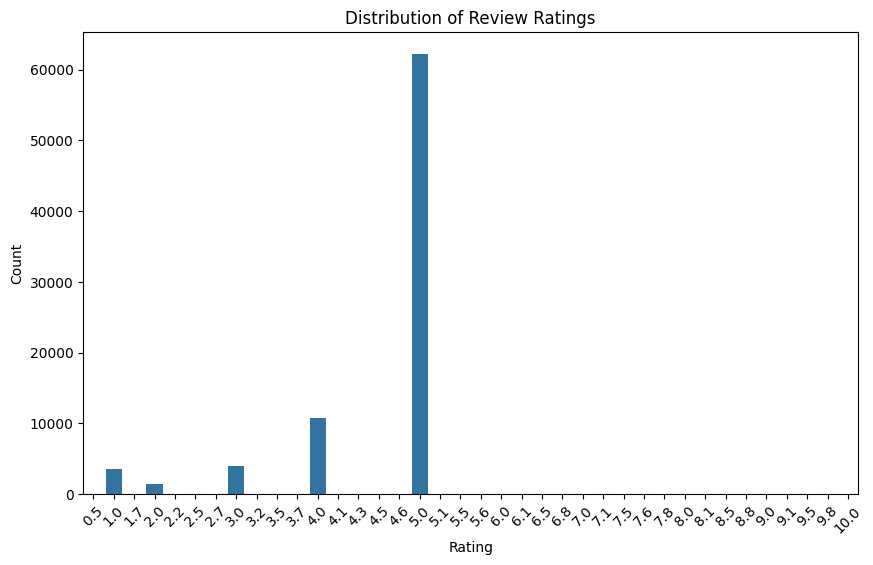

In [ ]:
# Exploratory Data Analysis (EDA)

# Step 1: Distribution of Review Ratings
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of review ratings with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='review_rating')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels 45 degrees for better readability
plt.show()

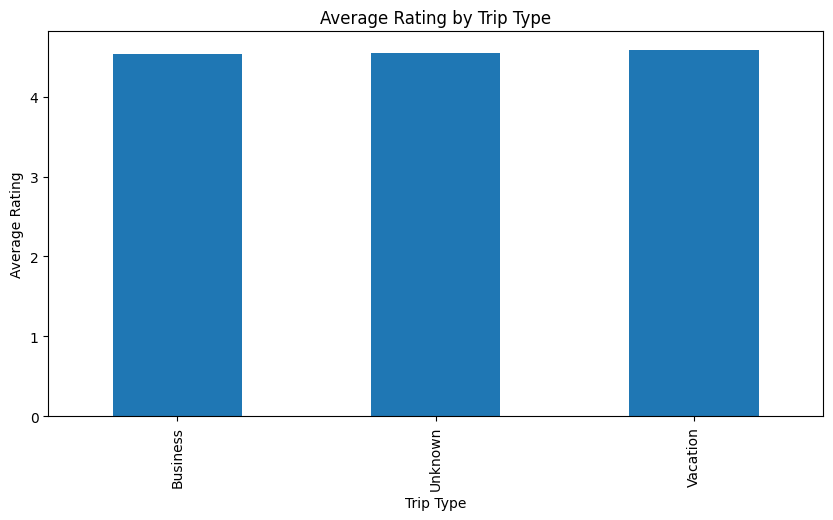

In [ ]:
# Step 2: Analyzing Average Rating by Trip Type

# Grouping by trip type and calculating the average rating
trip_type_ratings = data_clean.groupby('review_questions_Trip type')['review_rating'].mean()

# Plotting the results
trip_type_ratings.plot(kind='bar', title='Average Rating by Trip Type', figsize=(10, 5))
plt.xlabel('Trip Type')
plt.ylabel('Average Rating')
plt.show()

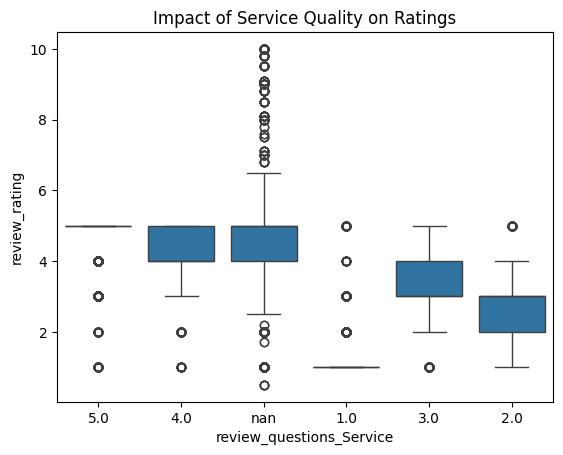

In [ ]:
# Step 3: Relationship Between Service Quality and Rating

# Plotting the relationship between service quality and review rating
sns.boxplot(data=data_clean, x='review_questions_Service', y='review_rating')
plt.title('Impact of Service Quality on Ratings')
plt.show()

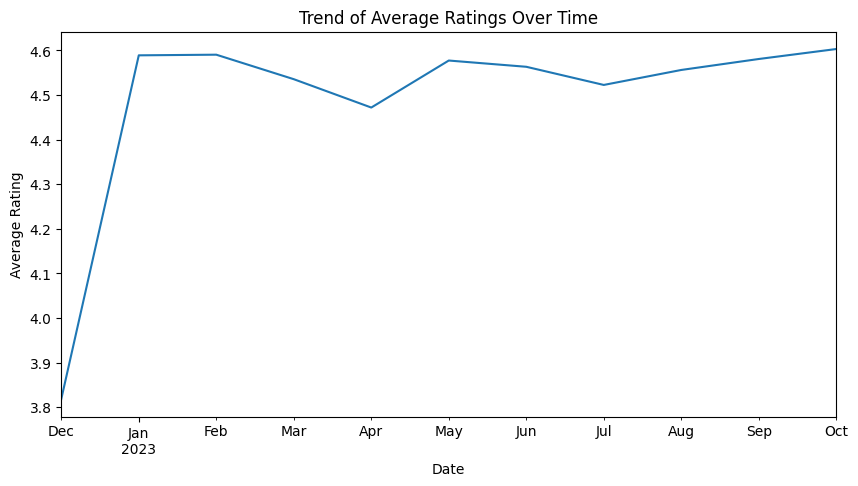

In [ ]:
# Step 4: Trends in Ratings Over Time

# Grouping by review date to analyze trends in ratings over time
data_clean.set_index('review_datetime_utc').resample('ME')['review_rating'].mean().plot(figsize=(10, 5))
plt.title('Trend of Average Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

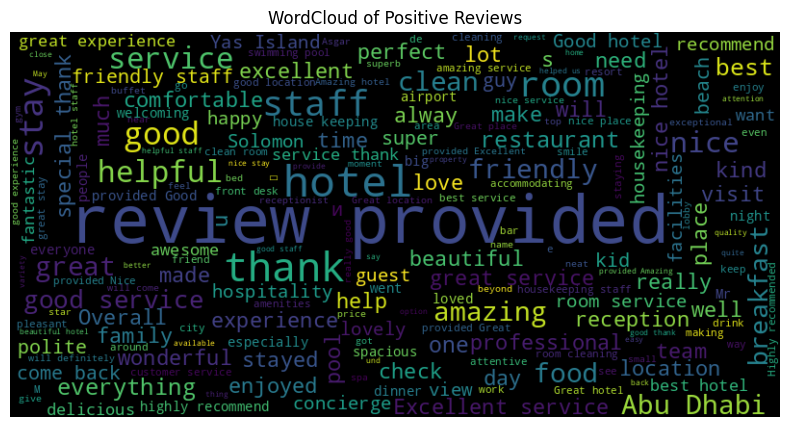

In [ ]:
# Step 5: WordCloud of Positive and Negative Reviews

from wordcloud import WordCloud

# WordCloud for Positive Reviews:

# Concatenating all positive reviews
positive_reviews = ' '.join(data_clean[data_clean['review_rating'] >= 4]['review_text'])

# Generating the WordCloud
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)

# Plotting the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Reviews')
plt.show()

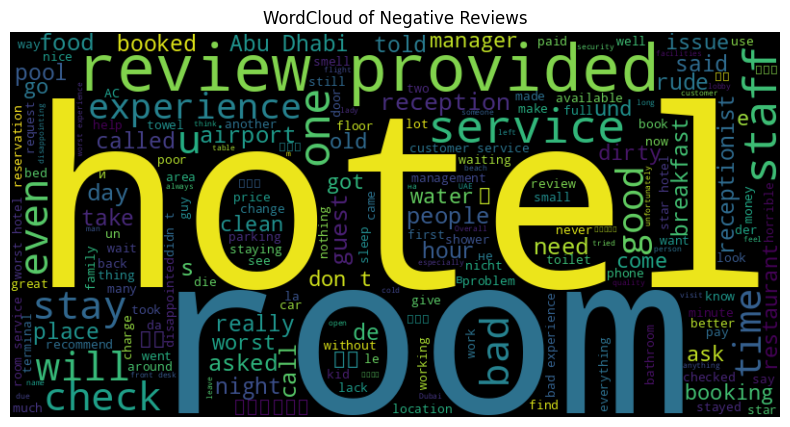

In [ ]:
# WordCloud for Negative Reviews:

# Concatenating all negative reviews
negative_reviews = ' '.join(data_clean[data_clean['review_rating'] <= 2]['review_text'])

# Generating the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Plotting the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Negative Reviews')
plt.show()

In [ ]:
# Sentiment Analysis with VADER (Valence Aware Dictionary for Sentiment Reasoning)

# Step 1: Installing the VADER Sentiment Analysis Tool

# Installing NLTK
!pip install nltk

# Importing the VADER Sentiment Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Downloading the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

sentiment
Positive    39664
Negative    31880
Neutral     10768
Name: count, dtype: int64


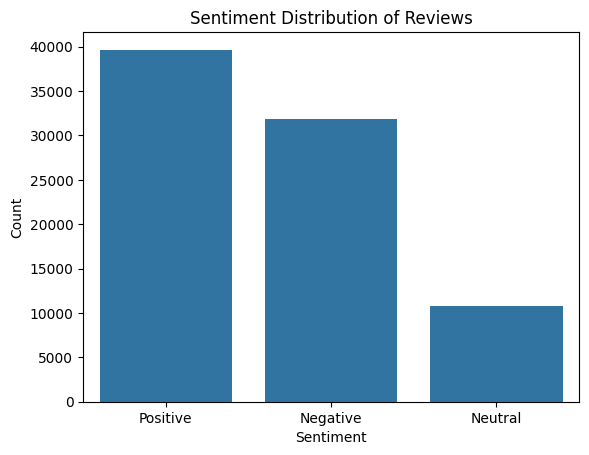

In [ ]:
# Step 2: Applying VADER Sentiment Analysis to Review Text

# Initializing the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Defining a function to classify sentiment based on the compound score
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying VADER to calculate sentiment scores for each review
data_clean['sentiment_score'] = data_clean['review_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classifying sentiment based on score
data_clean['sentiment'] = data_clean['sentiment_score'].apply(get_sentiment)

# Displaying the sentiment distribution
print(data_clean['sentiment'].value_counts())

# Plotting the sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_clean, x='sentiment')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Summarizing Reviews with a Gen AI Model

# Step 1: Installing the Hugging Face Transformers Library
!pip install transformers

# Step 2: Loading a Summarization Model
from transformers import pipeline

# Initialize the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Step 3: Summarizing Sample Reviews
# Selecting a few sample reviews for summarization
sample_reviews = data_clean[data_clean['review_text'].str.len() > 200]['review_text'].sample(5)

# Summarizing each review
for i, review in enumerate(sample_reviews):
    print(f"Original Review {i+1}:")
    print(review)
    summary = summarizer(review, max_length=50, min_length=10, do_sample=False)[0]['summary_text']
    print("\nSummarized Review:")
    print(summary)
    print("\n" + "="*50 + "\n")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Original Review 1:
The hotel is clean, close to where I needed to be and has direct access to the mall which is quite convenient.
Housekeeping is exceptional, and Ruth, Anil and Shams were absolutely wonderful. Thank you for a lovely stay!

Summarized Review:
Housekeeping is exceptional, and Ruth, Anil and Shams were absolutely wonderful. The hotel is clean, close to where I needed to be and has direct access to the mall which is quite convenient.


Original Review 2:
الغرف حلوة وواسعه ونظيفه.
ممرات الفندق بين الغرفه تعطيك انطباع اول مدى راحه المكان والهدوء.
الفطور منوع ولذيذ والمكان واسع والخدمه ١٠ على ١٠.
احيانا في المصعد بطاقه الغرفه ما تشتغل ولازم تحاول اكثر من مرة وتقرأ المعوذات عشان تشتغل.
يعيب المكان المواقف صحيح في خدمه صف السيارات بس توقف السيارة تحت الشمس.

Summarized Review:
phthalmologist.com.  ‘’ is a website dedicated to the study of the effects of stress on the human body. The site is based on a study by the University of Cambridge.


Original Review 3:
We recently staye